In [ ]:
!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 8.1 MB/s eta 0:00:00


In [ ]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
sys = signal.dlti([3, 4], [1, 2], dt=0.1)
sys

TransferFunctionDiscrete(
array([3., 4.]),
array([1., 2.]),
dt: 0.1
)

In [ ]:
# @title Funcion de transferencia
import control as ctrl

#ctrl.TransferFunction.z
print(ctrl.TransferFunction(sys.num, sys.den, dt=0.1))


<TransferFunction>: sys[11]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


3 z + 4
-------
 z + 2

dt = 0.1



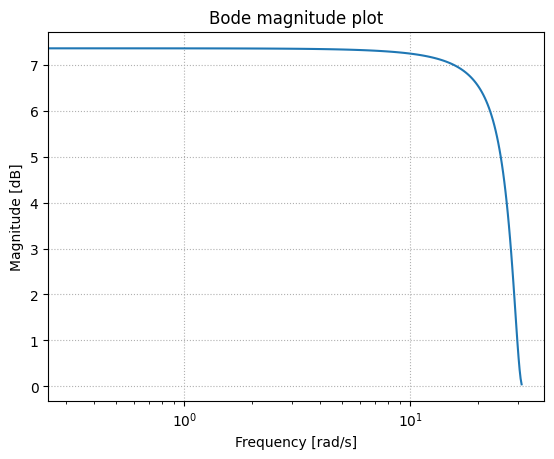

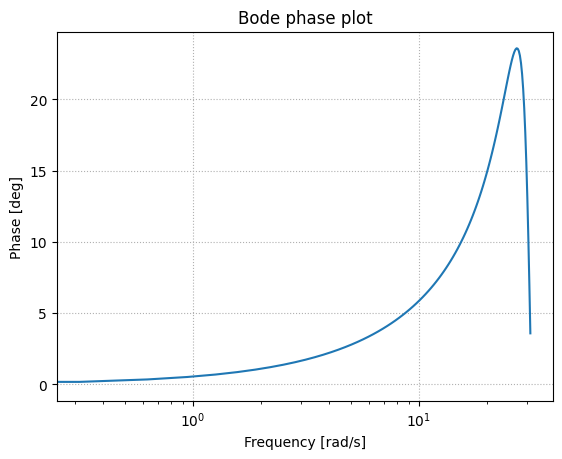

In [ ]:
w, mag, phase = signal.dbode(sys)

plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.grid(ls=":")
plt.title("Bode magnitude plot")
plt.xlabel("Frequency [rad/s]")
plt.ylabel("Magnitude [dB]")
plt.show()

plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.grid(ls=":")
plt.title("Bode phase plot")
plt.xlabel("Frequency [rad/s]")
plt.ylabel("Phase [deg]")
plt.show()


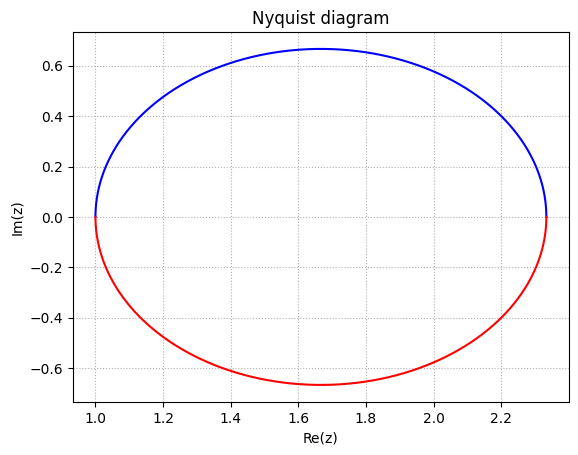

In [ ]:
w, H = signal.dfreqresp(sys)

plt.figure()
plt.plot(H.real, H.imag, "b")
plt.plot(H.real, -H.imag, "r")
plt.grid(ls=":")
plt.title("Nyquist diagram")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.show()

In [ ]:
sys

TransferFunctionDiscrete(
array([3., 4.]),
array([1., 2.]),
dt: 0.1
)

In [ ]:
signal.ZerosPolesGain(sys)

ZerosPolesGainDiscrete(
array([-1.33333333]),
array([-2.]),
3.0,
dt: 0.1
)

In [ ]:
sys_zpk = sys.to_zpk()
sys_zpk

ZerosPolesGainDiscrete(
array([-1.33333333]),
array([-2.]),
3.0,
dt: 0.1
)

In [ ]:
sys_zpk.poles, sys_zpk.zeros, sys_zpk.gain

(array([-2.]), array([-1.33333333]), 3.0)

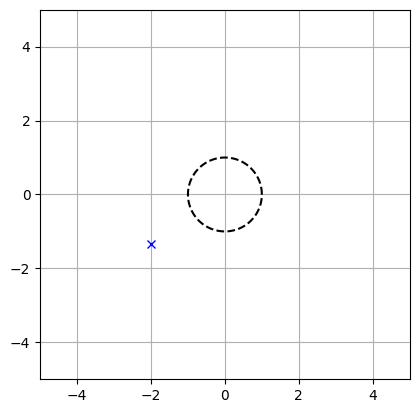

In [ ]:
t = np.linspace(0, 2*np.pi, 401)
plt.plot(np.cos(t), np.sin(t), 'k--')  # unit circle


plt.plot(sys_zpk.poles, sys_zpk.zeros, 'bx',
         label='Placed')
plt.grid()
plt.axis('image')
plt.axis([-1.1, 1.1, -1.1, 1.1])
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, numpoints=1)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()

In [ ]:
!pip install zplane

In [ ]:
import zplane as zp

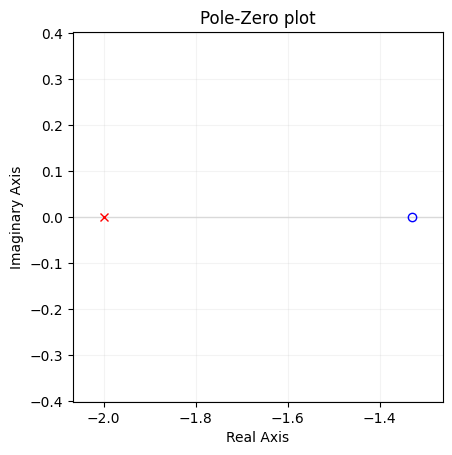

<Figure size 640x480 with 0 Axes>

In [ ]:
zp.pz(sys)

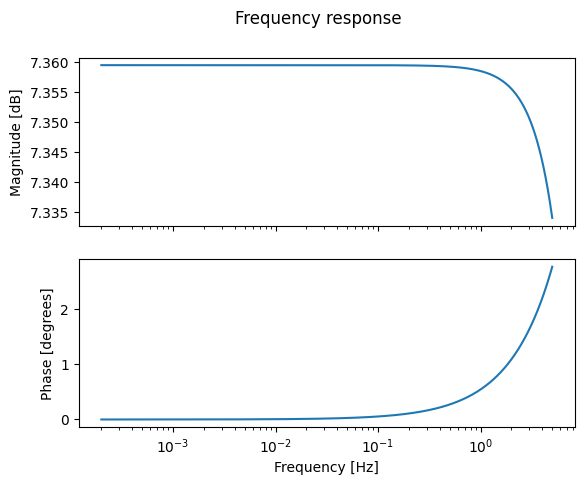

<Figure size 640x480 with 0 Axes>

In [ ]:
zp.bode(sys)

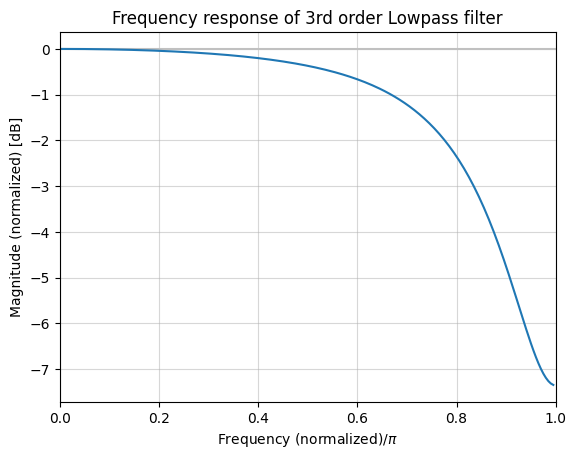

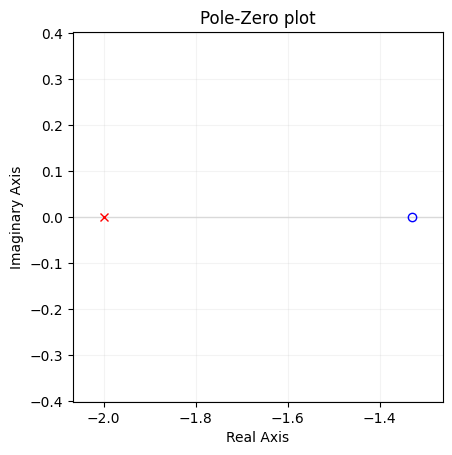

<Figure size 640x480 with 0 Axes>

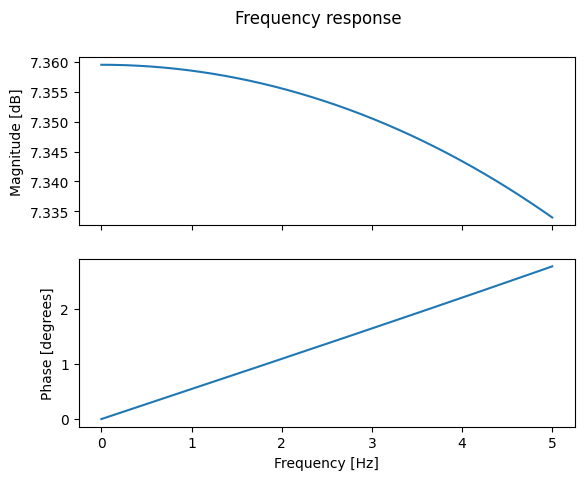

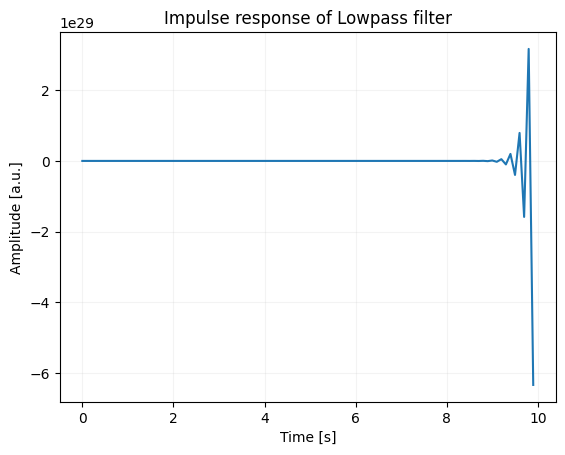

<Figure size 640x480 with 0 Axes>

In [ ]:
tf = sys.to_tf()
tf
# Normalised frequency response with grid
zp.freq(tf, type='solid', grid=True, name='3rd order Lowpass filter')

# Pole-Zero plot
zp.pz(tf)

# Non logartihmic Bode plot cut short of Nyquist Frequency
zp.bode(tf, log=False)

# Impulse response
zp.impulse(tf, name='Lowpass filter')

# Normalising system (In this case norm does nothing as sig.butter normalises the generated filter)
zp.norm(tf)